In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
import yfinance as yf

In [16]:
sp500 = yf.download('^GSPC','1920-01-31',period='M')['Adj Close']

[*********************100%***********************]  1 of 1 completed


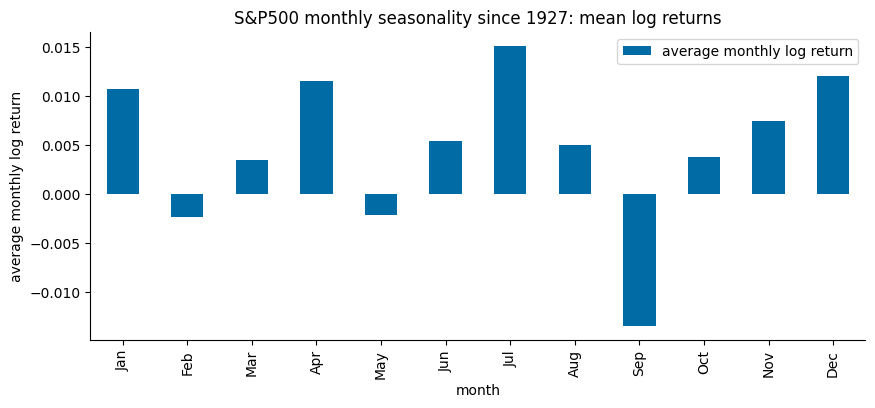

In [17]:
sp500_monthly=sp500.resample('M').last()
sp500_ret = sp500_monthly.pct_change().dropna()
sp500_ret = np.log1p(sp500_ret)
sp500_ret = sp500_ret.to_frame()
sp500_ret.columns=['monthly_return']
sp500_ret['month'] = sp500_ret.index.month
sp500_ret['month'] = pd.to_datetime(sp500_ret.month, format='%m').dt.strftime('%b')
#sp500_ret['Month'] = pd.to_datetime(sp500_ret['Month'], format='%m').dt.strftime('%b')
mean_returns = sp500_ret.groupby('month').mean()
mean_returns.index = pd.to_datetime(mean_returns.index, format = '%b')
mean_returns.sort_index(inplace=True)
mean_returns.index = mean_returns.index.strftime('%b')

plt.style.use(plt.style.available[-1])
ax = mean_returns.monthly_return.plot(figsize=(10,4),kind='bar', label = 'average monthly log return', legend=True)
ax.set_title('S&P500 monthly seasonality since 1927: mean log returns')
ax.set_ylabel('average monthly log return')
sns.despine()
plt.show()


In [18]:
sp500_ret.describe()

,monthly_return
count,1143.000000
mean,0.004738
std,0.053981
min,-0.355851
25%,-0.019654
50%,0.009068
75%,0.035252
max,0.330294


In [19]:
worst_month = sp500_ret.loc[sp500_ret.monthly_return==sp500_ret.min()[0], 'monthly_return']
worst_month

Date
1931-09-30   -0.355851
Freq: M, Name: monthly_return, dtype: float64

<AxesSubplot: >

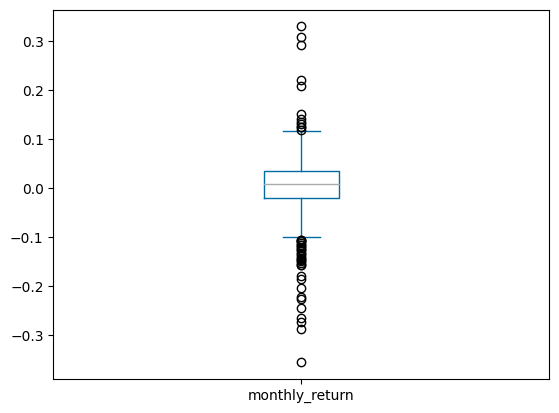

In [20]:
# describe first, boxplot next
sp500_ret.plot(kind='box')

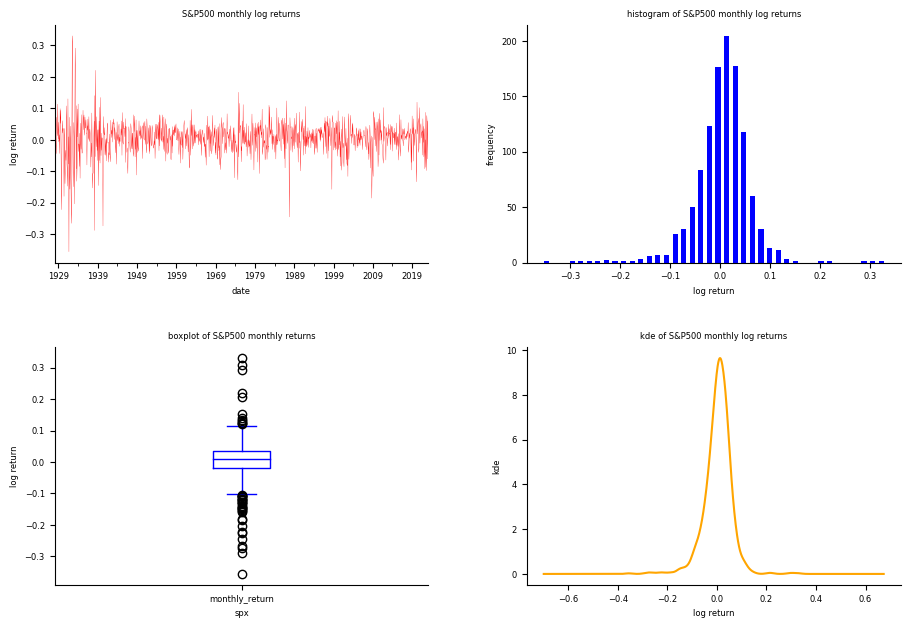

In [21]:
# best visual description of time-series: boxplot, hist, kde

fig,(ax) = plt.subplots(2,2, figsize=(10,7))
fig.tight_layout(pad=4)

sp500_ret.monthly_return.plot(ax=ax[0,0], fontsize=6, color='red', linewidth=0.2)
ax[0,0].set_title('S&P500 monthly log returns', fontsize=6)
ax[0,0].set_ylabel('log return', fontsize=6)
ax[0,0].set_xlabel('date', fontsize=6)

sp500_ret.monthly_return.plot(kind='box', ax=ax[1,0], fontsize=6, color='blue')
ax[1,0].set_title('boxplot of S&P500 monthly returns', fontsize=6)
ax[1,0].set_ylabel('log return', fontsize=6)
ax[1,0].set_xlabel('spx', fontsize=6)

sp500_ret.monthly_return.plot(kind='hist', ax=ax[0,1], fontsize=6, color='blue',bins=40, rwidth=0.6)
ax[0,1].set_title('histogram of S&P500 monthly log returns', fontsize=6)
ax[0,1].set_ylabel('frequency', fontsize=6)
ax[0,1].set_xlabel('log return', fontsize=6)

sp500_ret.monthly_return.plot(kind='density', ax=ax[1,1], fontsize=6, color='orange')
ax[1,1].set_title('kde of S&P500 monthly log returns', fontsize=6)
ax[1,1].set_ylabel('kde', fontsize=6)
ax[1,1].set_xlabel('log return', fontsize=6)





sns.despine()
plt.show()

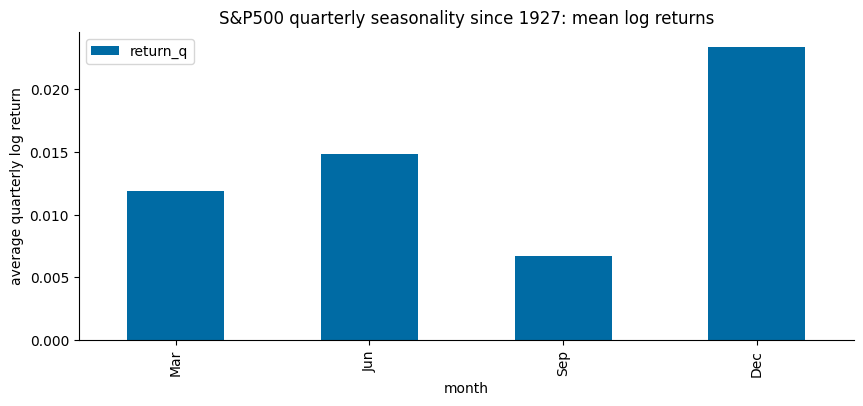

In [25]:
sp500_q=sp500.resample('Q').last()
sp500_retq = sp500_q.pct_change().dropna()
sp500_retq = np.log1p(sp500_retq)
sp500_retq = sp500_retq.to_frame()
sp500_retq.columns=['return_q']
sp500_retq['month'] = sp500_retq.index.month
sp500_retq['month'] = pd.to_datetime(sp500_retq.month, format='%m').dt.strftime('%b')
mean_returnsq = sp500_retq.groupby('month').mean()
mean_returnsq.index = pd.to_datetime(mean_returnsq.index, format = '%b')
mean_returnsq.sort_index(inplace=True)
mean_returnsq.index = mean_returnsq.index.strftime('%b')

plt.style.use(plt.style.available[-1])
ax=mean_returnsq.plot(figsize=(10,4),kind='bar', label = 'average quarterly log return')
ax.set_title('S&P500 quarterly seasonality since 1927: mean log returns')
ax.set_ylabel('average quarterly log return')
sns.despine()
plt.legend()
plt.show()

In [74]:
sp500_retq.head()

,return_q,month
Date,,
1928-03-31,0.087766,Mar
1928-06-30,-0.007288,Jun
1928-09-30,0.099387,Sep
1928-12-31,0.141365,Dec
1929-03-31,0.047322,Mar


In [77]:
spx_q4_returns

,return_q,month
Date,,
1928-12-31,0.141365,Dec
1929-12-31,-0.340792,Dec
1930-12-31,-0.192160,Dec
1931-12-31,-0.178826,Dec
1932-12-31,-0.154976,Dec
...,...,...
2018-12-31,-0.150493,Dec
2019-12-31,0.081895,Dec
2020-12-31,0.110540,Dec


In [78]:
#test for significance in differences (anova)
spx_q4_returns = sp500_retq[sp500_retq.month=='Dec'].return_q
spx_q4_returns = stats.ttest_1samp(spx_q4_returns, 0, alternative='greater')
print(spx_q4_returns)

Ttest_1sampResult(statistic=2.3806454369161676, pvalue=0.00964992624957571)


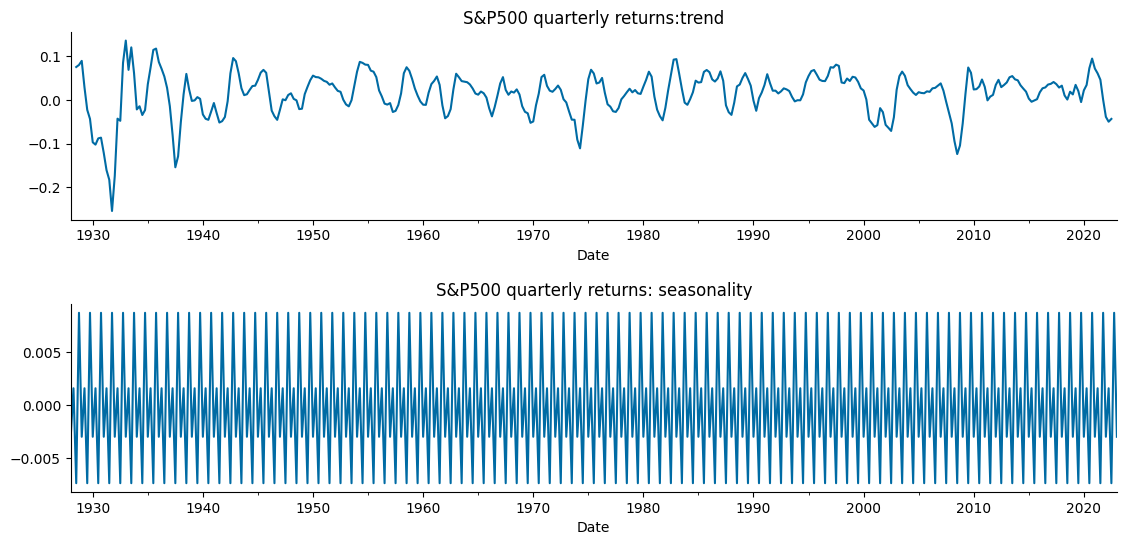

In [42]:
spx_seasonal = sm.tsa.seasonal_decompose(sp500_retq.return_q)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,6))
fig.tight_layout(pad=4)

spx_seasonal.trend.plot(ax = ax1)
ax1.set_title('S&P500 quarterly returns:trend')

spx_seasonal.seasonal.plot(ax=ax2, title='S&P500 quarterly returns: seasonality')

sns.despine()
plt.show()

In [52]:
type(sp500_ret.monthly_return)

pandas.core.series.Series

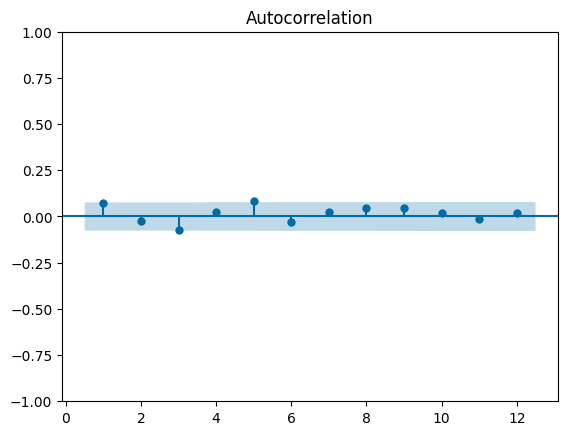

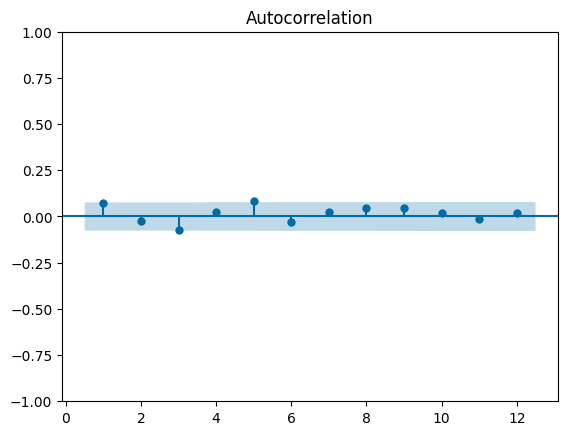

In [73]:
plot_acf(sp500_ret.monthly_return, zero=False,lags=12,alpha=0.01)

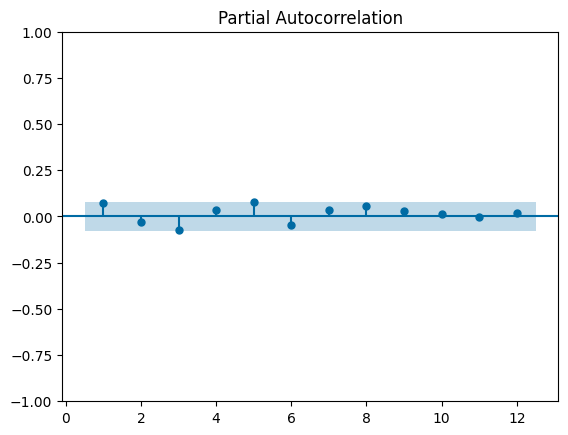

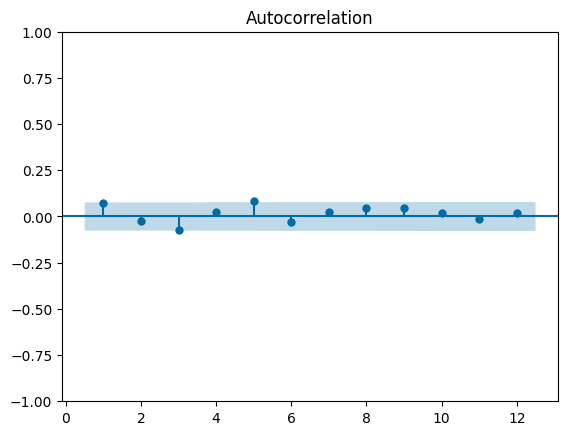

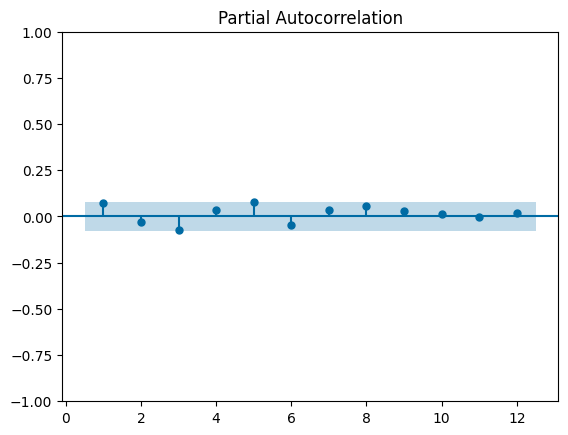

In [72]:
plot_pacf(sp500_ret.monthly_return, zero=False,lags=12,alpha=0.01)